In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
import itertools
import time
import statsmodels.formula.api as sm

train = pd.read_csv('ncaa_train.csv')
test = pd.read_csv('ncaa_test.csv')
train.head()

,Player,GP,GS,MIN,PTS,FGM,FGA,FGP,Three_Pmade,Three_PA,...,FTP,OFF,DEF,TRB,AST,STL,BLK,TOV,PF,NBA_PTS
0,Cade Cunningham,27,26,35.4,20.15,6.48,14.81,0.44,2.30,5.74,...,0.85,0.70,5.48,6.19,3.48,1.59,0.78,4.04,2.48,17.41
1,Jalen Suggs,30,30,28.9,14.37,5.17,10.27,0.50,1.17,3.47,...,0.76,0.60,4.73,5.33,4.53,1.90,0.33,2.93,2.60,11.75
2,Franz Wagner,28,26,31.8,12.46,4.43,9.29,0.48,1.25,3.64,...,0.84,0.71,5.82,6.54,3.00,1.25,1.04,1.29,2.21,15.15
3,Davion Mitchell,30,30,32.4,14.00,5.27,10.30,0.51,2.10,4.70,...,0.64,0.47,2.20,2.67,5.50,1.90,0.37,2.43,2.37,11.48
4,James Bouknight,15,14,31.6,18.73,6.53,14.60,0.45,1.47,5.00,...,0.78,1.53,4.13,5.67,1.80,1.13,0.27,2.80,1.87,4.58


In [2]:
train.corr()['NBA_PTS'].sort_values(ascending=False)

NBA_PTS        1.000000
GS             0.433931
FTP            0.351406
GP             0.337517
MIN            0.323561
STL            0.318212
FGM            0.270299
Three_Pmade    0.260686
PTS            0.249359
Three_PA       0.245180
DEF            0.228423
FGP            0.200565
FGA            0.191621
Three_PP       0.118538
BLK            0.104205
TRB            0.101691
PF             0.090852
TOV            0.073663
FTM            0.053743
AST           -0.007441
FTA           -0.015898
OFF           -0.241982
Name: NBA_PTS, dtype: float64

In [3]:
#All Predictors Base Model
model1 = sm.ols(formula = 'NBA_PTS~GS+FTP+GP+MIN+STL+FGM+Three_Pmade+PTS+DEF+FGP+FGA+BLK+TRB+PF+TOV+AST+FTA+OFF+Three_PP+Three_PA', data=train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                NBA_PTS   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     1.368
Date:                Sun, 12 Mar 2023   Prob (F-statistic):              0.312
Time:                        19:19:10   Log-Likelihood:                -68.205
No. Observations:                  31   AIC:                             178.4
Df Residuals:                      10   BIC:                             208.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      24.5531     54.712      0.449      0.663     -97.353     146.459
GS              0.3822      0.457      0.836      0.422      -0.636       1.400
FTP           -16.7203     36.769     -0.455      0.659     -98.646      65.206
GP             -0.0191      0.510     -0.037      0.971      -1.155       1.117
MIN            -0.1806      0.448     -0.403      0.695      -1.179       0.818
STL             1.8960      2.957      0.641      0.536      -4.692       8.484
FGM           -31.1965     30.714     -1.016      0.334     -99.632      37.239
Three_Pmade   -13.4931      9.828     -1.373      0.200     -35.392       8.406
PTS            16.3161     15.864      1.029      0.328     -19.030      51.662
DEF           -28.3527    164.569     -0.172      0.867    -395.036     338.331
FGP            10.9439     14.203      0.771      0.459     -20.701      42.589
FGA            -0.2702      1.759     -0.154      0.881      -4.189       3.648
BLK             3.3331      4.434      0.752      0.470      -6.548      13.214
TRB            29.1618    164.638      0.177      0.863    -337.675     395.999
PF              0.0109      3.025      0.004      0.997      -6.728       6.750
TOV             2.4447      2.238      1.092      0.300      -2.543       7.432
AST            -0.7914      0.801     -0.988      0.346      -2.576       0.993
FTA           -14.5552     12.961     -1.123      0.288     -43.435      14.324
OFF           -31.0310    164.681     -0.188      0.854    -397.963     335.901
Three_PP      -45.5084     50.228     -0.906      0.386    -157.424      66.407
Three_PA       -1.5783      5.505     -0.287      0.780     -13.845      10.689
==============================================================================
Omnibus:                        3.100   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                1.792
Skew:                          -0.314   Prob(JB):                        0.408
Kurtosis:                       3.996   Cond. No.                     2.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='GS', ylabel='NBA_PTS'>

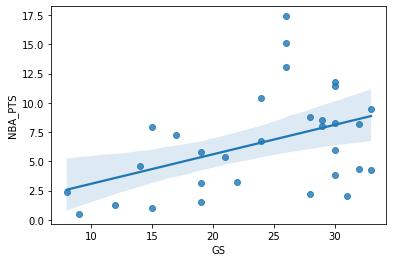

In [4]:
sns.regplot(x='GS',y='NBA_PTS', data=train)

In [5]:
preds1 = model1.predict(test)
actuals = test[['NBA_PTS']]
actuals = actuals.iloc[:,0]
print('RMSE = ', np.sqrt(((preds1 - actuals)**2).mean()),'resid. standard error = ',np.sqrt(model1.mse_resid))

RMSE =  7.0380521721926215 resid. standard error =  3.845568228666777


Text(0, 0.5, 'Residuals')

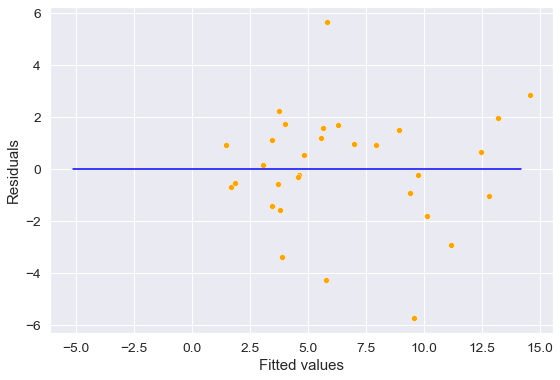

In [6]:
#Plotting residuals vs fitted values
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model1.fittedvalues, y=model1.resid,color = 'orange')
sns.lineplot(x = [preds1.min(),preds1.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

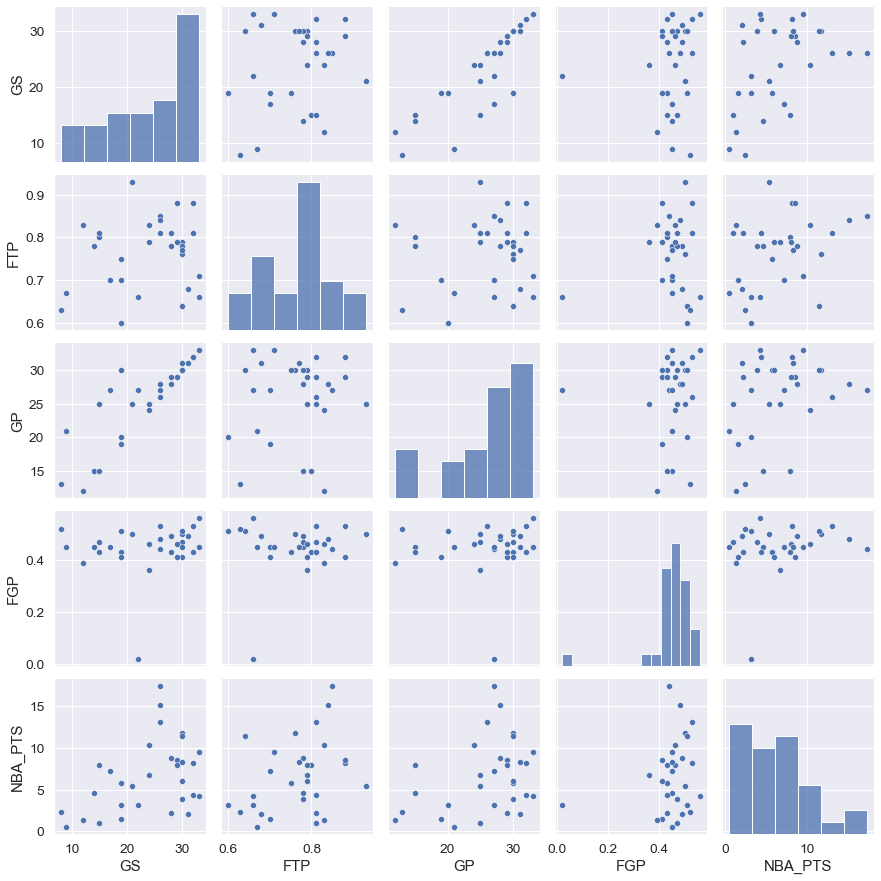

In [7]:
top4 = train[['GS','FTP','GP','FGP','NBA_PTS']]
sns.pairplot(top4)

In [8]:
#Model 2 MLR
model2 = sm.ols(formula = 'np.log(NBA_PTS)~GS+GP+FTP+FGP+I(GS**2)+I(GP**2)+I(FGP**2)', data=train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(NBA_PTS)   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     3.256
Date:                Sun, 12 Mar 2023   Prob (F-statistic):             0.0149
Time:                        19:19:15   Log-Likelihood:                -27.736
No. Observations:                  31   AIC:                             71.47
Df Residuals:                      23   BIC:                             82.94
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.2269      2.298     -0.969      0.343      -6.980       2.526
GS              0.4347      0.174      2.502      0.020       0.075       0.794
GP             -0.2512      0.256     -0.982      0.336      -0.781       0.278
FTP             1.6106      1.815      0.887      0.384      -2.144       5.365
FGP            -1.7620      4.972     -0.354      0.726     -12.047       8.523
I(GS ** 2)     -0.0086      0.004     -2.040      0.053      -0.017       0.000
I(GP ** 2)      0.0051      0.006      0.864      0.397      -0.007       0.017
I(FGP ** 2)     6.1480      7.994      0.769      0.450     -10.389      22.685
==============================================================================
Omnibus:                        2.965   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                2.201
Skew:                          -0.492   Prob(JB):                        0.333
Kurtosis:                       2.143   Cond. No.                     7.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#Model 2 RMSE
preds2 = model2.predict(test)
actuals = test[['NBA_PTS']]
actuals = actuals.iloc[:,0]
print('RMSE = ', np.sqrt(((preds2 - actuals)**2).mean()),'resid. standard error = ',np.sqrt(model2.mse_resid))

RMSE =  7.315852743977371 resid. standard error =  0.6872999485748477


Text(0, 0.5, 'Residuals')

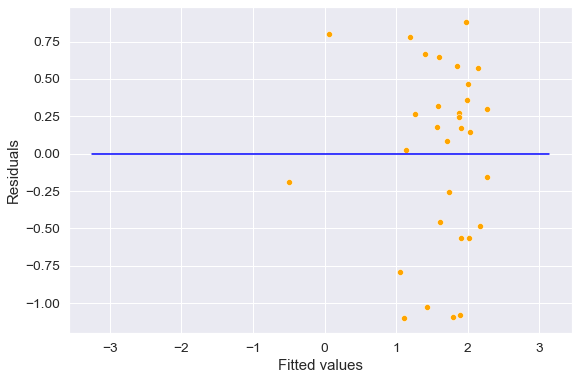

In [10]:
#Plotting residuals vs fitted values
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model2.fittedvalues, y=model2.resid,color = 'orange')
sns.lineplot(x = [preds2.min(),preds2.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [11]:
out = model2.outlier_test()
out

,student_resid,unadj_p,bonf(p)
0,1.370350,0.184400,1.0
1,0.691606,0.496419,1.0
2,0.869039,0.394208,1.0
3,0.944851,0.354997,1.0
4,0.411635,0.684590,1.0
5,0.406532,0.688279,1.0
6,0.490252,0.628809,1.0
7,-0.407735,0.687409,1.0
8,-0.267478,0.791593,1.0
9,-0.850743,0.404077,1.0


In [12]:
#Number of points with absolute studentized residuals greater than 3
np.sum((np.abs(out.student_resid)>3))

0

In [13]:
#VIF table starting with all predictors and removing one-by-one until all <5
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = train[['GS', 'MIN', 'FGP',
       'Three_PA', 'Three_PP', 'FTA', 'FTP', 'OFF', 'DEF', 'AST',
       'STL', 'BLK', 'TOV', 'PF']]

X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

     feature         VIF
0      const  294.702398
1         GS    1.850221
2        MIN    3.732064
3        FGP    1.509959
4   Three_PA    3.387936
5   Three_PP    2.724658
6        FTA    3.472252
7        FTP    2.501875
8        OFF    2.318019
9        DEF    1.977811
10       AST    3.230762
11       STL    2.317251
12       BLK    2.074200
13       TOV    3.929724
14        PF    1.658651


In [14]:
#Forward Stepwise Selection
#Creating a set of predictors from which we need to find the best subset of predictors
X = train[['GS', 'MIN', 'FGP',
       'Three_PA', 'Three_PP', 'FTA', 'FTP', 'OFF', 'DEF', 'AST',
       'STL', 'BLK', 'TOV', 'PF']]
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('NBA_PTS~' + '+'.join(predictor_subset),data = train).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [15]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [16]:
models_best = forward_selection()

Processed  14 models on 1 predictors in 0.0687859058380127 seconds.
Processed  13 models on 2 predictors in 0.06737685203552246 seconds.
Processed  12 models on 3 predictors in 0.07131505012512207 seconds.
Processed  11 models on 4 predictors in 0.08124971389770508 seconds.
Processed  10 models on 5 predictors in 0.08268308639526367 seconds.
Processed  9 models on 6 predictors in 0.08104705810546875 seconds.
Processed  8 models on 7 predictors in 0.08411693572998047 seconds.
Processed  7 models on 8 predictors in 0.0853729248046875 seconds.
Processed  6 models on 9 predictors in 0.07649087905883789 seconds.
Processed  5 models on 10 predictors in 0.0712120532989502 seconds.
Processed  4 models on 11 predictors in 0.06197404861450195 seconds.
Processed  3 models on 12 predictors in 0.10854792594909668 seconds.
Processed  2 models on 13 predictors in 0.0325322151184082 seconds.
Processed  1 models on 14 predictors in 0.017319202423095703 seconds.
Total elapsed time: 1.0234696865081787 se

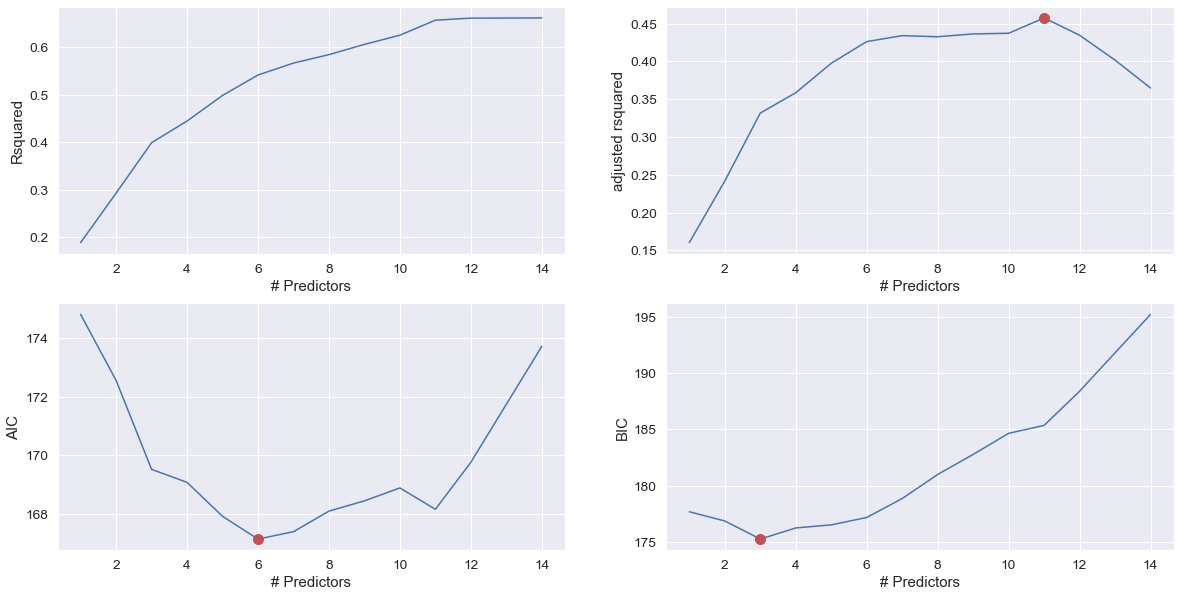

In [17]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [48]:
best_fwd_reg_model = models_best['model'][6]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                NBA_PTS   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     4.716
Date:                Sun, 12 Mar 2023   Prob (F-statistic):            0.00265
Time:                        19:29:25   Log-Likelihood:                -76.565
No. Observations:                  31   AIC:                             167.1
Df Residuals:                      24   BIC:                             177.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.5679      7.889     -1.593      0.124     -28.850       3.714
GS             0.3614      0.091      3.972      0.001       0.174       0.549
OFF           -3.9649      1.429     -2.774      0.011      -6.915      -1.015
BLK            5.0575      2.115      2.391      0.025       0.692       9.423
FTP           11.7793      8.635      1.364      0.185      -6.043      29.602
TOV            2.4482      1.089      2.249      0.034       0.201       4.695
AST           -0.7967      0.531     -1.500      0.147      -1.893       0.300
==============================================================================
Omnibus:                        1.154   Durbin-Watson:                   1.141
Prob(Omnibus):                  0.562   Jarque-Bera (JB):                1.088
Skew:                          -0.310   Prob(JB):                        0.580
Kurtosis:                       2.323   Cond. No.                         497.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Forward Stepwise RMSE
preds4 = best_fwd_reg_model.predict(test)
print('RMSE = ', np.sqrt(((preds4 - actuals)**2).mean()),'resid. standard error = ',np.sqrt(best_fwd_reg_model.mse_resid))

RMSE =  6.552775041931067 resid. standard error =  3.250715534024272


In [62]:
# Creating a dataframe that will consist of all combinations of polynomial transformations of the 
# predictors to be considered for interactions

predictor_set = ['GS', 'OFF', 'TOV']
from itertools import product
values = np.arange(0,3)
polynomial_transformations = pd.DataFrame(product(values, repeat=3), columns=predictor_set).loc[1:,]
polynomial_transformations.loc[:,'sum_degree'] = (polynomial_transformations).astype(int).sum(axis=1)
polynomial_transformations.loc[:,'count_zeros'] = (polynomial_transformations == 0).astype(int).sum(axis=1)
polynomial_transformations.sort_values(by = ['count_zeros', 'sum_degree'], ascending=[False, True], inplace=True)
polynomial_transformations.drop(columns = ['count_zeros'], inplace=True)
polynomial_transformations.reset_index(inplace = True, drop = True)

In [63]:
#Setting the seed as we are shuffling the data before splitting it into K-folds
np.random.seed(123)
# Shuffling the training set before creating K folds
train = train.sample(frac=1)
k = 5 #5-fold cross validation
fold_size = np.round(train.shape[0]/k)

In [64]:
def KFoldCV(selected_interactions, interaction_being_tested):
    array_new1 = [None]*k
    for i in range(k):
        dropped = np.arange(i*fold_size, (i+1)*fold_size)
        test_new = train.loc[dropped,:]
        train_new = train.drop(dropped)
        model = sm.ols('NBA_PTS~GS+OFF+TOV'+selected_interactions+interaction_being_tested, data = train_new).fit()
        pred = model.predict(test_new)
        array_new1[i] = np.sqrt(((test_new.NBA_PTS - pred)**2).mean())
    return np.mean(array_new1)# mean of array_new1

In [65]:
# This code implements the algorithm of systematically considering interactions of degree 2 and going upto 
# the interaction of degree 12. For a given degree 'd' the interactions are selected greedily based on 
# highest reduction in the 5-fold cross validation RMSE. Once no more reduction in the 5-fold cross validation
# RMSE is possible using interactions of degree 'd', interaction terms of the next higher degree 'd+1' are considered.

# 5-fold cross validation RMSE of the initial model with the 4 predictors of degree one
cv_previous_model = KFoldCV(selected_interactions = '', interaction_being_tested = '')
interaction_being_tested = '+'
selected_interactions = ''

# Considering interactions of degree 'd' = 2 to 12
for d in np.arange(2,13):
    
    # Selecting interaction terms of degree = 'd'
    degree_set = polynomial_transformations.loc[polynomial_transformations.sum_degree==d, :]
    
    # Initializing objects to store the interactions of degree 'd' that reduce the
    # 5-fold cross validation RMSEs as compared to the previous model
    interactions_that_reduce_KfoldCV = []; cv_degree = []; 
    
    # Creating another DataFrame that will consist of the updated set of interactions of degree 'd' to be considered
    # as interactions that do not reduce the 5-fold cross validation RMSE will be discarded
    degree_set_updated = pd.DataFrame(columns = degree_set.columns)
    
    # Continue adding interactions of degree 'd' in the model until no interactions reduce 
    # the 5-fold cross-validation RMSE
    while True:
        
        #Iterating over all possible interactions of degree 'd'
        for index, row in degree_set.iterrows():
            
            # Creating the formula expression for the interaction term to be tested
            for predictor in predictor_set:
                interaction_being_tested = interaction_being_tested + ('I('+predictor +'**' +\
                                         str(row[predictor]) + ')*' if row[predictor]>1 else\
                                               predictor + '*' if row[predictor]==1 else '')
            interaction_being_tested = interaction_being_tested[:-1]
            
            # Call the function 'KFoldCV' to find out the 5-fold cross validation error on adding the 
            # interaction term being tested to the model
            cv = KFoldCV(selected_interactions, interaction_being_tested)
            
            # If the interaction term being tested reduces the 5-fold cross validation RMSE as compared to the
            # previous model, then consider adding it to the model
            if cv<cv_previous_model:
                interactions_that_reduce_KfoldCV.append(interaction_being_tested)
                cv_degree.append(cv)
                degree_set_updated = pd.concat([degree_set_updated, row.to_frame().T])
            interaction_being_tested = '+'
        cv_data = pd.DataFrame({'interaction':interactions_that_reduce_KfoldCV, 'cv':cv_degree})
        
        # Sort the interaction terms that reduce the 5-fold cross valdiation RMSE based on their respective
        # 5-fold cross validation RMSE
        cv_data.sort_values(by = 'cv', inplace = True)
        
        # Break the loop if no interaction of degree 'd' reduces the 5-fold cross validation RMSE as
        # compared to the previous model
        if cv_data.shape[0]==0:
            break
            
        # Select the interaction that corresponds to the least 5-fold cross validation RMSE
        selected_interactions = selected_interactions + cv_data.iloc[0,0]
        cv_previous_model = cv_data.iloc[0,1]
        cv_degree = []; interactions_that_reduce_KfoldCV = []
        degree_set = degree_set_updated.copy()
        degree_set_updated = pd.DataFrame(columns = degree_set.columns)
        
        # Print the progress after each model update, i.e., after an interaction term is selected
        print("Degree of interactions being considered:",d, ", 5-fold CV RMSE:", cv_previous_model)

Degree of interactions being considered: 2 , 5-fold CV RMSE: 3.742973177180054


In [66]:
selected_interactions

'+GS*TOV'

In [67]:
kfold_model = sm.ols(formula = 'NBA_PTS~GS+OFF+TOV+GS*TOV', data=train).fit()
kfold_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                NBA_PTS   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     4.300
Date:                Sun, 12 Mar 2023   Prob (F-statistic):            0.00839
Time:                        19:32:33   Log-Likelihood:                -80.768
No. Observations:                  31   AIC:                             171.5
Df Residuals:                      26   BIC:                             178.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.7002      7.446      1.706      0.100      -2.604      28.005
GS            -0.2502      0.307     -0.815      0.422      -0.881       0.381
OFF           -2.3707      1.270     -1.866      0.073      -4.982       0.240
TOV           -4.4396      2.913     -1.524      0.140     -10.427       1.548
GS:TOV         0.2335      0.124      1.888      0.070      -0.021       0.488
==============================================================================
Omnibus:                        1.511   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                0.550
Skew:                           0.219   Prob(JB):                        0.760
Kurtosis:                       3.483   Cond. No.                         779.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
#K-fold Model RMSE
predsK = kfold_model.predict(test)
actuals = test[['NBA_PTS']]
actuals = actuals.iloc[:,0]
print('RMSE = ', np.sqrt(((predsK - actuals)**2).mean()))

RMSE =  5.848066627524104
